# DATE:26-10-2023


# TEAM ID:3886


# PROJECT TITLE:Air Quality Analysis in TamilNadu

# IMPORTING LIBRARIES

In [28]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# LOADING THE DATASET

In [29]:
dataset= pd.read_csv("C:\\Users\\SANTH\\Downloads\\cpcb_dly_aq_tamil_nadu-2014.csv")


# DATA EXPLORATION:

In [30]:
dataset


,Stn Code,Sampling Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPM/PM10,PM 2.5
0,38,01-02-2014,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,11.0,17.0,55.0,NaN
1,38,01-07-2014,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,13.0,17.0,45.0,NaN
2,38,21-01-2014,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,12.0,18.0,50.0,NaN
3,38,23-01-2014,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,15.0,16.0,46.0,NaN
4,38,28-01-2014,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,13.0,14.0,42.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2874,773,12-03-2014,Tamil Nadu,Trichy,"Central Bus Stand, Trichy",Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",15.0,18.0,102.0,NaN
2875,773,12-10-2014,Tamil Nadu,Trichy,"Central Bus Stand, Trichy",Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",12.0,14.0,91.0,NaN
2876,773,17-12-2014,Tamil Nadu,Trichy,"Central Bus Stand, Trichy",Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",19.0,22.0,100.0,NaN
2877,773,24-12-2014,Tamil Nadu,Trichy,"Central Bus Stand, Trichy",Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",15.0,17.0,95.0,NaN


In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Stn Code                        2879 non-null   int64  
 1   Sampling Date                   2879 non-null   object 
 2   State                           2879 non-null   object 
 3   City/Town/Village/Area          2879 non-null   object 
 4   Location of Monitoring Station  2879 non-null   object 
 5   Agency                          2879 non-null   object 
 6   Type of Location                2879 non-null   object 
 7   SO2                             2868 non-null   float64
 8   NO2                             2866 non-null   float64
 9   RSPM/PM10                       2875 non-null   float64
 10  PM 2.5                          0 non-null      float64
dtypes: float64(4), int64(1), object(6)
memory usage: 247.5+ KB


In [32]:
dataset.describe()

,Stn Code,SO2,NO2,RSPM/PM10,PM 2.5
count,2879.000000,2868.000000,2866.000000,2875.000000,0.0
mean,475.750261,11.503138,22.136776,62.494261,NaN
std,277.675577,5.051702,7.128694,31.368745,NaN
min,38.000000,2.000000,5.000000,12.000000,NaN
25%,238.000000,8.000000,17.000000,41.000000,NaN
50%,366.000000,12.000000,22.000000,55.000000,NaN
75%,764.000000,15.000000,25.000000,78.000000,NaN
max,773.000000,49.000000,71.000000,269.000000,NaN


In [33]:
dataset.columns

Index(['Stn Code', 'Sampling Date', 'State', 'City/Town/Village/Area',
       'Location of Monitoring Station', 'Agency', 'Type of Location', 'SO2',
       'NO2', 'RSPM/PM10', 'PM 2.5'],
      dtype='object')

# DATA VISUALIZATION:

# 1.Histogram for SO2 levels

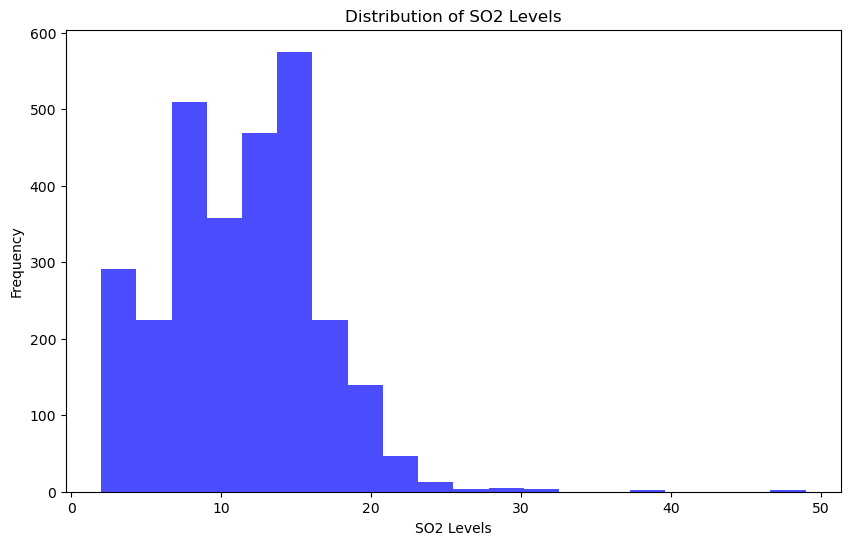

In [34]:
plt.figure(figsize=(10, 6))
plt.hist(dataset['SO2'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of SO2 Levels')
plt.xlabel('SO2 Levels')
plt.ylabel('Frequency')
plt.show()

# 2.Scatter plot of NO2 vs. RSPM/PM10

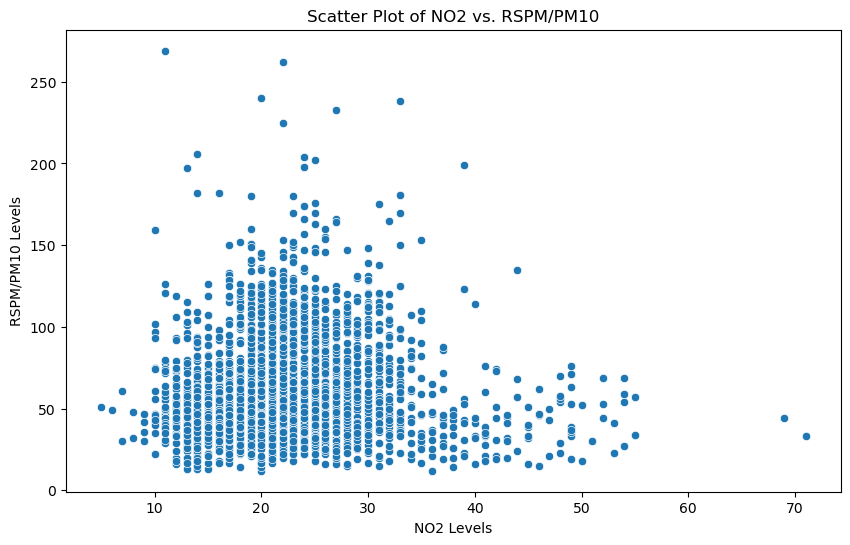

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NO2', y='RSPM/PM10', data=dataset)
plt.title('Scatter Plot of NO2 vs. RSPM/PM10')
plt.xlabel('NO2 Levels')
plt.ylabel('RSPM/PM10 Levels')
plt.show()

# 3.Bar chart for State-wise SO2 levels

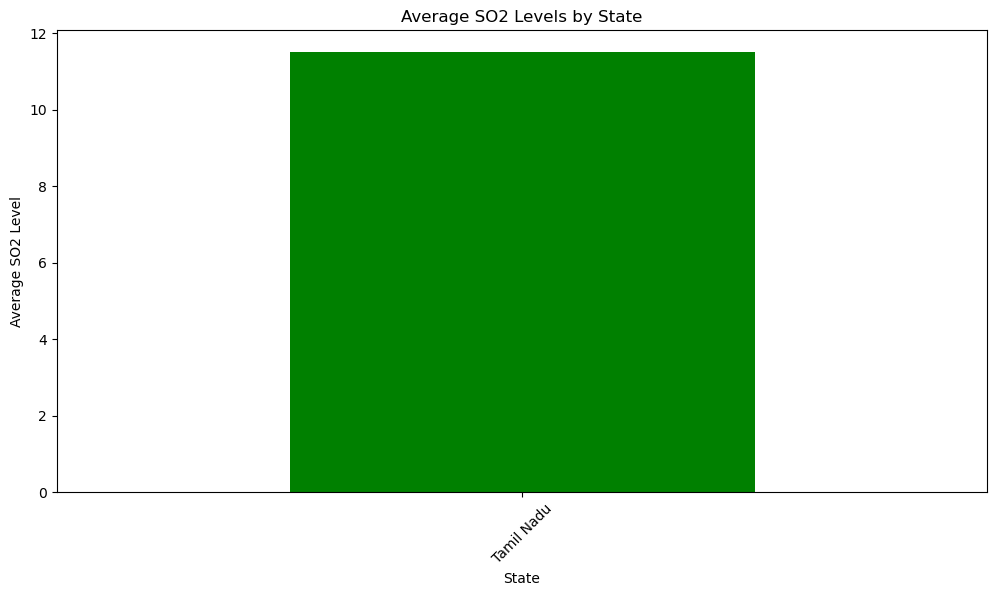

In [36]:
statewise_so2 = dataset.groupby('State')['SO2'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
statewise_so2.plot(kind='bar', color='green')
plt.title('Average SO2 Levels by State')
plt.xlabel('State')
plt.ylabel('Average SO2 Level')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x800 with 0 Axes>

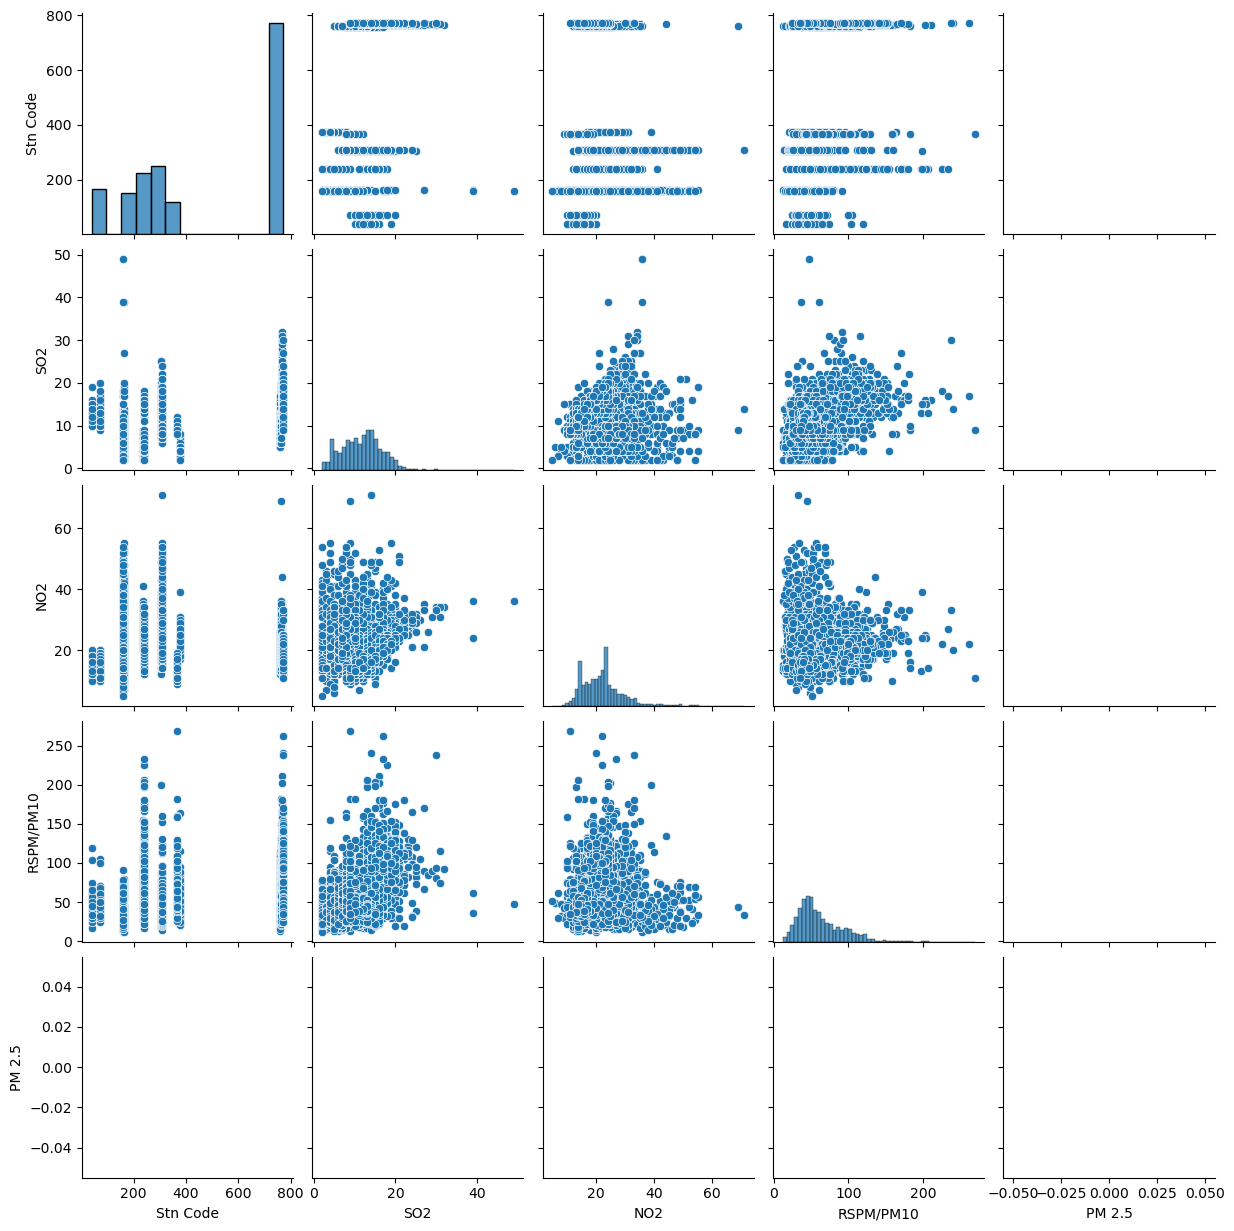

In [37]:
plt.figure(figsize=(12,8))
sns.pairplot(dataset)

array([[<AxesSubplot:title={'center':'Stn Code'}>,
        <AxesSubplot:title={'center':'SO2'}>],
       [<AxesSubplot:title={'center':'NO2'}>,
        <AxesSubplot:title={'center':'RSPM/PM10'}>],
       [<AxesSubplot:title={'center':'PM 2.5'}>, <AxesSubplot:>]],
      dtype=object)

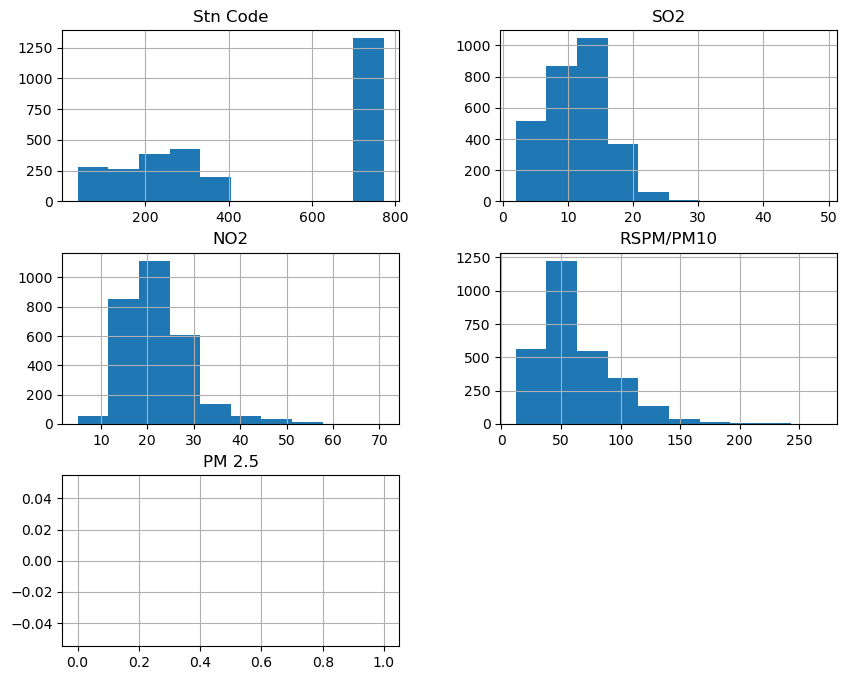

In [38]:
dataset.hist(figsize=(10,8))

# Visualising Correlation 

In [39]:
dataset.corr()


,Stn Code,SO2,NO2,RSPM/PM10,PM 2.5
Stn Code,1.000000,0.263537,-0.043257,0.336190,NaN
SO2,0.263537,1.000000,0.078246,0.445152,NaN
NO2,-0.043257,0.078246,1.000000,0.068277,NaN
RSPM/PM10,0.336190,0.445152,0.068277,1.000000,NaN
PM 2.5,NaN,NaN,NaN,NaN,NaN


# calculating Averages:

In [40]:

so2_by_area = dataset.groupby('City/Town/Village/Area')['SO2'].mean().sort_values(ascending=False)

no2_by_area = dataset.groupby('City/Town/Village/Area')['NO2'].mean().sort_values(ascending=False)


rspm_pm10_by_area = dataset.groupby('City/Town/Village/Area')['RSPM/PM10'].mean().sort_values(ascending=False)
print("Average SO2 levels by City/Town/Village/Area:")
print(so2_by_area)

print("\nAverage NO2 levels by City/Town/Village/Area:")
print(no2_by_area)

print("\nAverage RSPM/PM10 levels by City/Town/Village/Area:")
print(rspm_pm10_by_area)


Average SO2 levels by City/Town/Village/Area:
City/Town/Village/Area
Trichy         15.293956
Madurai        13.319728
Chennai        13.014042
Thoothukudi    12.989691
Cuddalore       8.965986
Mettur          8.429268
Salem           8.114504
Coimbatore      4.541096
Name: SO2, dtype: float64

Average NO2 levels by City/Town/Village/Area:
City/Town/Village/Area
Salem          28.664122
Madurai        25.768707
Coimbatore     25.325342
Mettur         23.185366
Chennai        22.088442
Cuddalore      19.710884
Trichy         18.695055
Thoothukudi    18.512027
Name: NO2, dtype: float64

Average RSPM/PM10 levels by City/Town/Village/Area:
City/Town/Village/Area
Trichy         85.054496
Thoothukudi    83.458904
Salem          62.954198
Cuddalore      61.881757
Chennai        58.998000
Mettur         52.721951
Coimbatore     49.217241
Madurai        45.724490
Name: RSPM/PM10, dtype: float64


# creating visualization:

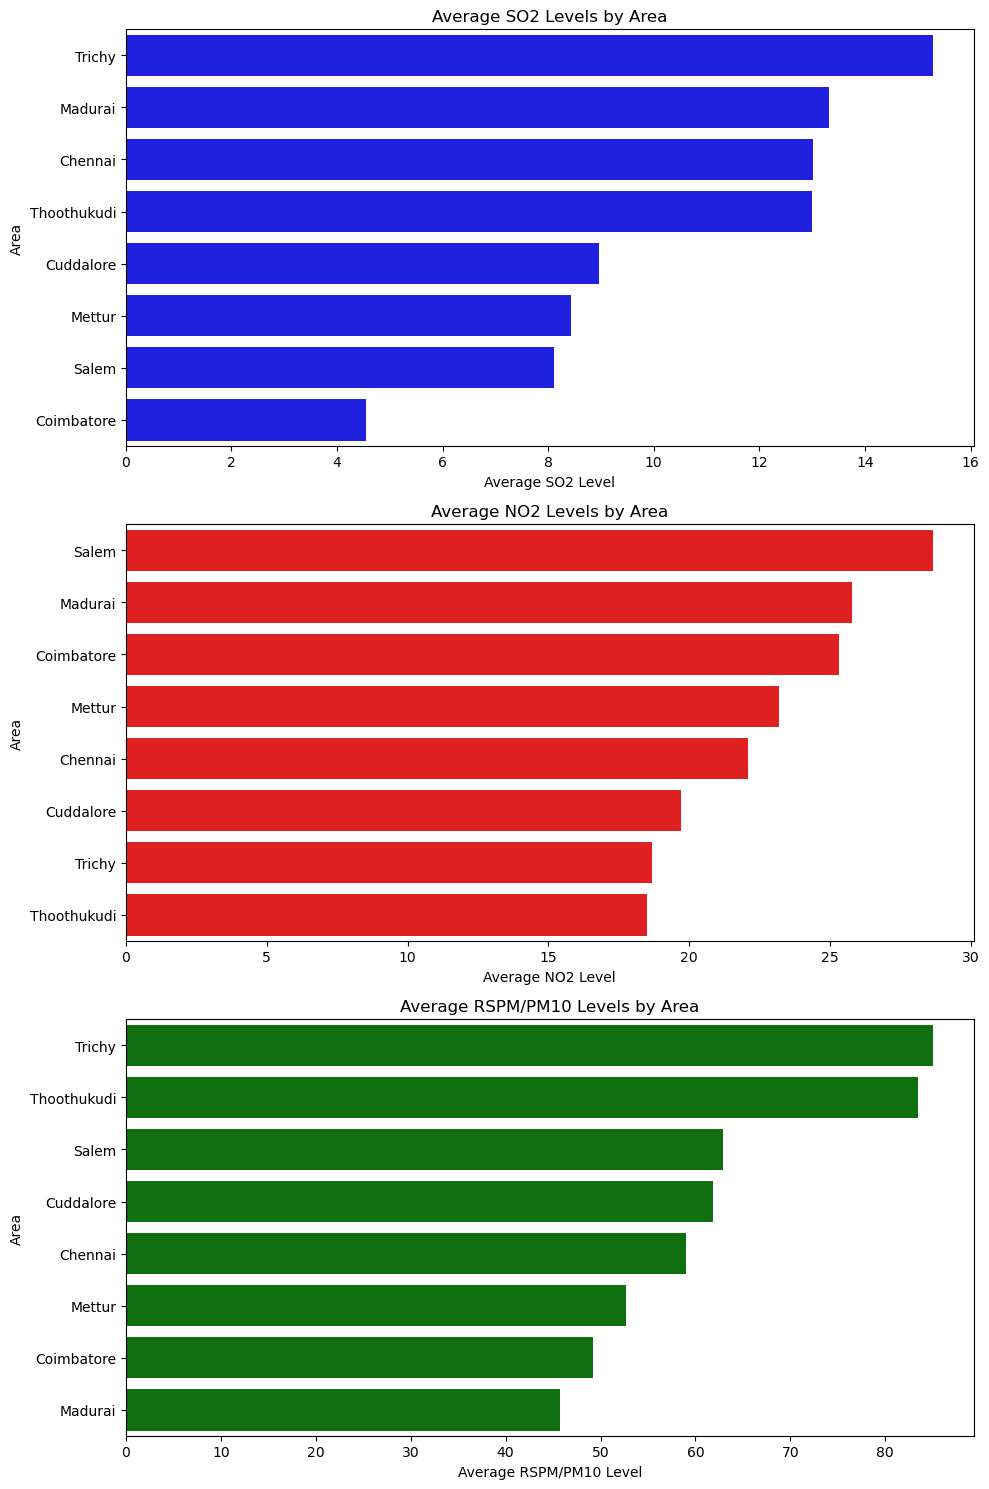

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns


so2_by_area = dataset.groupby('City/Town/Village/Area')['SO2'].mean().sort_values(ascending=False)
no2_by_area = dataset.groupby('City/Town/Village/Area')['NO2'].mean().sort_values(ascending=False)
rspm_pm10_by_area = dataset.groupby('City/Town/Village/Area')['RSPM/PM10'].mean().sort_values(ascending=False)

fig, axes = plt.subplots(3, 1, figsize=(10, 15))

sns.barplot(x=so2_by_area.values, y=so2_by_area.index, ax=axes[0], color='blue')
axes[0].set_title('Average SO2 Levels by Area')
axes[0].set_xlabel('Average SO2 Level')
axes[0].set_ylabel('Area')


sns.barplot(x=no2_by_area.values, y=no2_by_area.index, ax=axes[1], color='red')
axes[1].set_title('Average NO2 Levels by Area')
axes[1].set_xlabel('Average NO2 Level')
axes[1].set_ylabel('Area')


sns.barplot(x=rspm_pm10_by_area.values, y=rspm_pm10_by_area.index, ax=axes[2], color='green')
axes[2].set_title('Average RSPM/PM10 Levels by Area')
axes[2].set_xlabel('Average RSPM/PM10 Level')
axes[2].set_ylabel('Area')

plt.tight_layout()
plt.show()
